<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/Tips_Tricks_10_loading_images_and_masks_in_order_for_sem_segm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video link: https://youtu.be/XNf1ATR9OSk

This code demonstrates the process of sorting images and masks before loading to ensure a proper match between them. 

In [ ]:
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt

Normal way of loading (without sorting). Works fine on windows but images and masks may not be lined up properly on Linux (and possibly Mac).

In [ ]:
#Capture training image info as a list
train_images = []

for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/"):
    for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
        print(img_path)
        img = cv2.imread(img_path, 1)       
        train_images.append(img)
       
#Convert list to array for machine learning processing        
train_images = np.array(train_images)



In [ ]:
train_images.shape

(150, 128, 128, 3)

In [ ]:
#Capture mask/label info as a list
train_masks = [] 
for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.tif")):
        print(mask_path)
        mask = cv2.imread(mask_path, 0)       
        train_masks.append(mask)
        
#Convert list to array for machine learning processing          
train_masks = np.array(train_masks)

In [ ]:
train_masks.shape

(150, 128, 128)

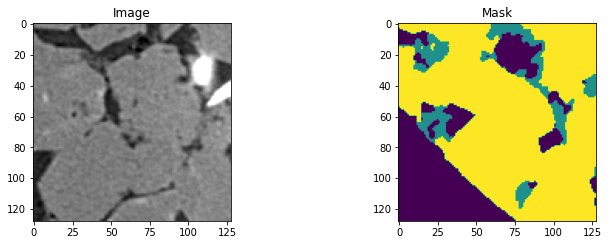

In [ ]:
import random
img_number = random.randint(0, len(train_images)-1)
img = train_images[img_number]
mask = train_masks[img_number]


plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('Image')
plt.imshow(img)
plt.subplot(222)
plt.title('Mask')
plt.imshow(mask)
plt.show()

Sorting images and masks based on the file name before loading them. 

In [ ]:
image_names = glob.glob("/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/*.tif")
image_names.sort()
#image_names_subset = image_names[0:num_images]



In [ ]:
print(image_names)

['/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/img0.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/img1.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/img10.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/img100.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/img101.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/img102.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/img103.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/img104.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/img105.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/img106.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/images/img10

In [ ]:
images = [cv2.imread(image, 1) for image in image_names] 
image_dataset = np.array(images)

In [ ]:
mask_names = glob.glob("/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/*.tif")
mask_names.sort()
#mask_names_subset = mask_names[0:num_images]


In [ ]:
print(mask_names)

['/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/mask0.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/mask1.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/mask10.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/mask100.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/mask101.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/mask102.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/mask103.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/mask104.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/mask105.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/mask106.tif', '/content/drive/MyDrive/Colab Notebooks/data/sandstone_150_images_masks/masks/mask10

In [ ]:
masks = [cv2.imread(mask, 0) for mask in mask_names]
mask_dataset = np.array(masks)

In [ ]:
mask_dataset.shape

(150, 128, 128)

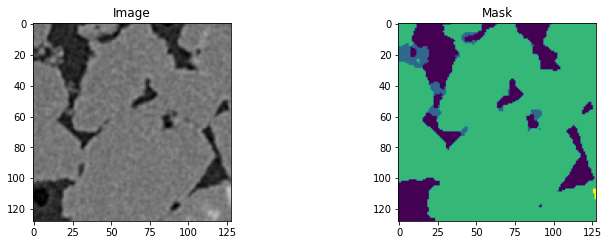

In [ ]:
import random
img_number = random.randint(0, len(train_images)-1)
img = image_dataset[img_number]
mask = mask_dataset[img_number]
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('Image')
plt.imshow(img)
plt.subplot(222)
plt.title('Mask')
plt.imshow(mask)
plt.show()